# Decision Tree Classification and Regression

Decision trees can be used to predict classes and continuous output (classification and regression).

**Discrete output example:** A weather prediction model that predicts whether or not there’ll be rain in a particular day.

**Continuous output example:** A profit prediction model that states the probable profit that can be generated from the sale of a product.

Here, you will see for both cases a simple dataset and therefore a small and understandable model.

## Purpose of this notebook

In this notebook, data is generated fictitiously to explain the functionality of decision trees. 
The focus here is on the **visualization of the tree with regards to the data points and the tree structure**. The fact that a clear overfitting takes place AND not train-test-splitting is performed is therefore irrelevant.

Feel free to alter some hyperparameter and test new ones to see how it affects the tree structure. Here you'll find the [scikit learn documentation](https://scikit-learn.org/stable/modules/tree.html#tree).

## Import the required libraries

In [17]:
# Import packages
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

RSEED= 50

## Decision tree for Classification

To begin, we'll use a very simple problems with only two features and two classes. This is a binary classification problem. 

First, we create the features `X` and the labels `y`. There are only two features, which will allow us to visualize the data and which makes this a very easy problem. 

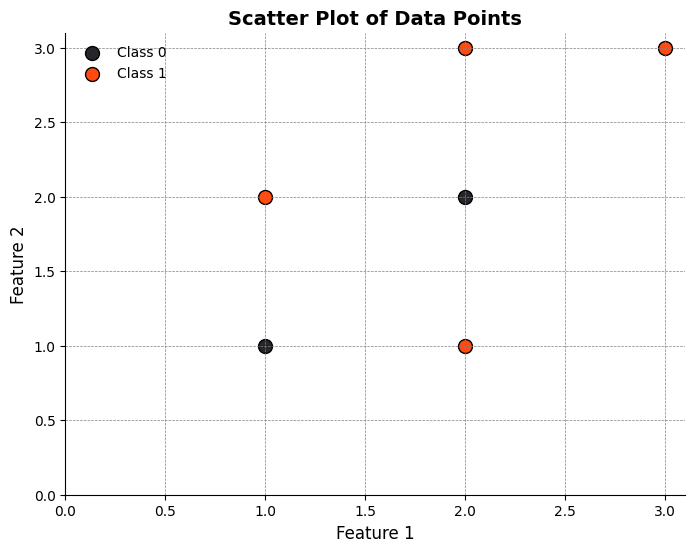

In [18]:
# Data
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])
# Labels
y = np.array([0, 1, 1, 1, 0, 1])

# Colors
colors = ['#252629', '#FF4A11']

# Plot
plt.figure(figsize=(8, 6))

for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], 
                c=colors[label], label=f'Class {label}', 
                edgecolor='k', s=100)

# Style adjustments for The Economist style
plt.title('Scatter Plot of Data Points', fontsize=14, weight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Axes starting at 0
plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


Even though there are only two features, this is a linearly inseparable problem. A simple linear classifier will not be able to draw a boundary that separates the classes. The single decision tree will be able to completely separate the points because it essentially draws many repeated linear boundaries between points. Keep in mind that the complexity of the decision tree grows with the size of the data.

## Single Decision Tree

Here we quickly build and train a single decision tree on the data using Scikit-Learn. The tree will learn how to separate the points, building a flowchart of questions based on the feature values and the labels. At each stage, the decision tree makes splits by maximizing the reduction in Gini impurity. 

We'll use the default hyperparameters for the decision tree which means it can grow as deep as necessary in order to completely separate the classes. This will lead to overfitting because the model memorizes the training data, and in practice, we usually want to limit the depth of the tree so it can generalize to testing data.

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

DecisionTreeClassifier(random_state=50)

In [20]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 9 nodes with maximum depth 3.


Our decision tree formed 9 nodes and reached a maximum depth of 3. It will have achieved 100% accuracy on the training data because we did not limit the depth and it therefore can classify every _training_ point perfectly.

In [21]:
print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0


## Visualize Decision Tree

To get a sense of how the decision tree "thinks", it's helpful to visualize the entire structure. This will show each node in the tree which we can use to make new predictions. Because the tree is relatively small, we can understand the entire image.

> Note: `X[1]` in the image below does not correspond to our label `x1`. `X[0]` refers to our first feature `x1` and `X[1]` to our second feature `x2`. 

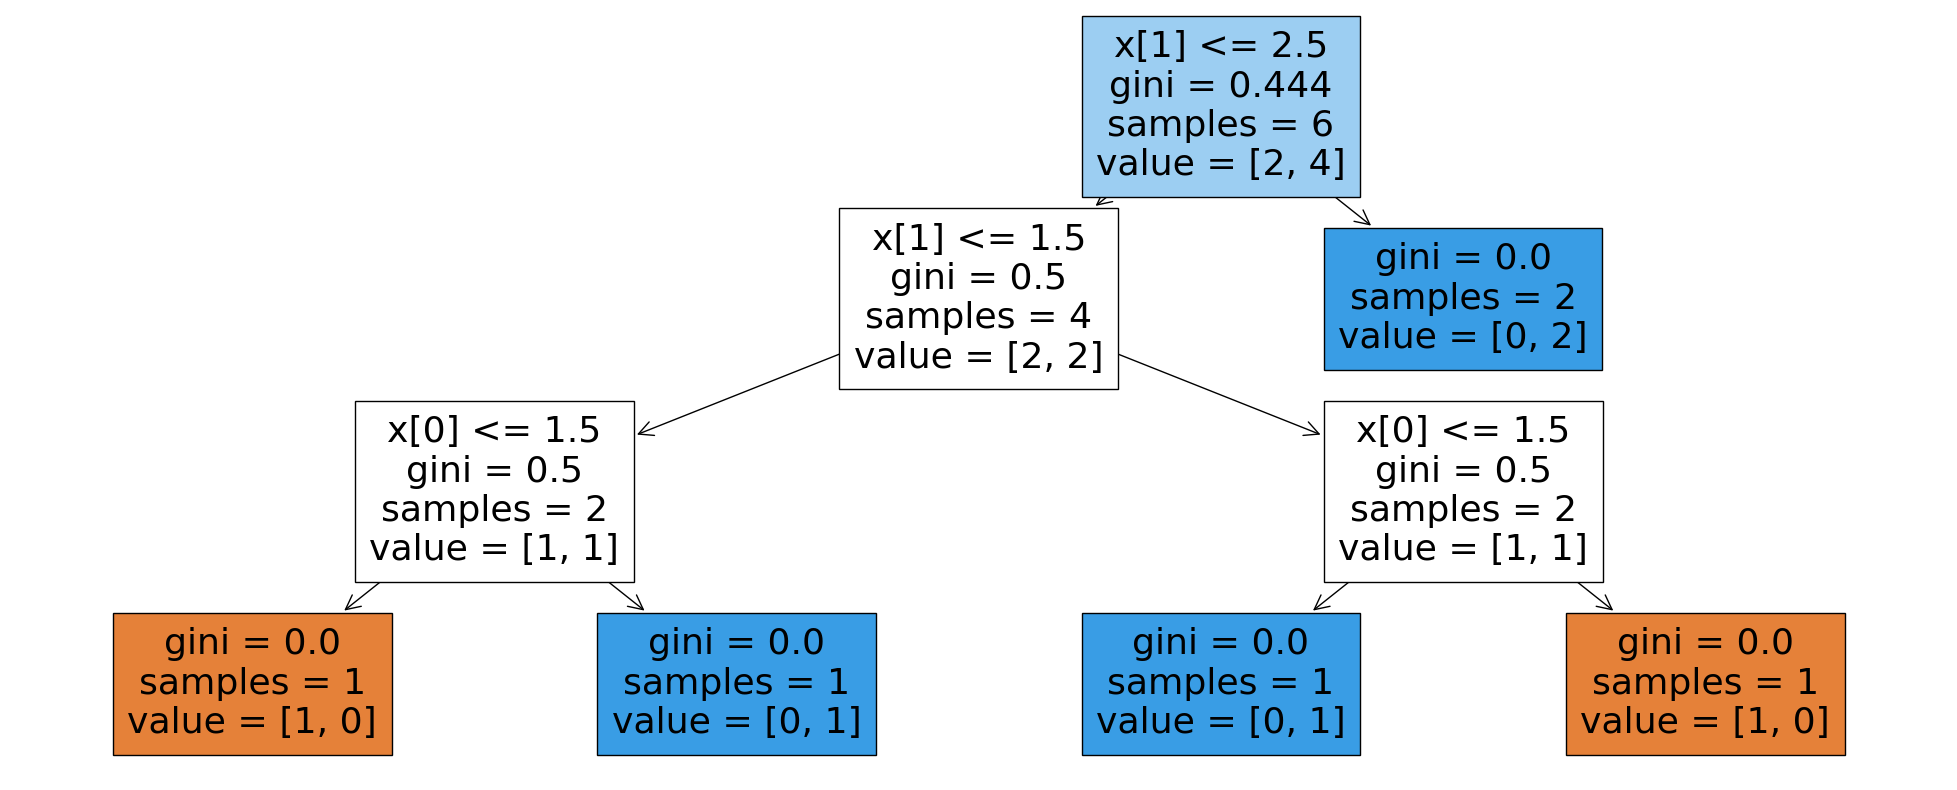

In [22]:
# import necessary library  
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,10))
dectree_plot = plot_tree(tree, filled=True)

A decision tree is an intuitive model: it makes decisions much as we might when faced with a problem by constructing a flowchart of questions. For each of the nodes (except the leaf nodes), the five rows represent:

1. Question asked about the data based on a feature: this determines the way we traverse down the tree for a new data point.
2. `gini`: the gini impurity of the node. The average (weighted by samples) gini impurity decreases with each level of the tree.
3. `samples`: number of training observations in the node
4. `value`: [number of samples in the first class, number of samples in the second class]
5. `class`: the class predicted for all the points in the node if the tree ended at this depth (defaults to 0 for a tie).

The leaf nodes (the terminal nodes at each branch) do not have a question because they are where the tree makes a prediction. All of the samples in a leaf node are assigned the same class. 

### Decision boundary

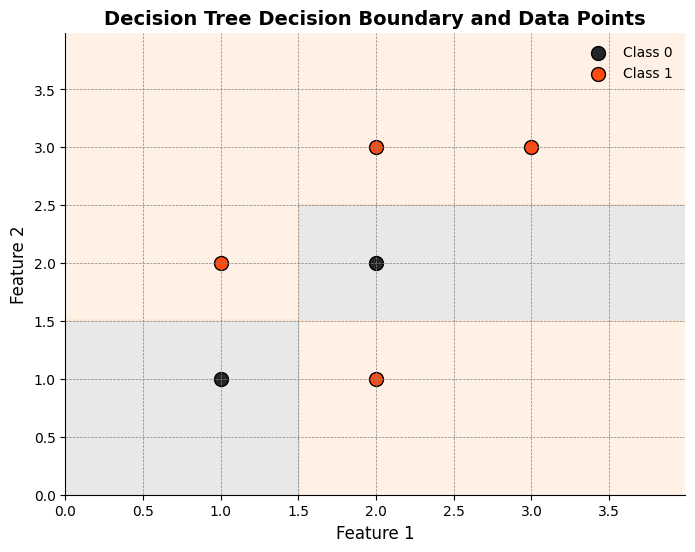

In [23]:
# Plotting decision boundary
x_min, x_max = 0, 4  # Start at 0 and provide some padding
y_min, y_max = 0, 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colors
colors = ['#252629', '#FF4A11']
cmap_light = ListedColormap(['#D3D3D3', '#FFE5CC'])  # Lighter colors for background

plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_light)

for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], 
                c=colors[label], label=f'Class {label}', 
                edgecolor='k', s=100)

# Style adjustments for The Economist style
plt.title('Decision Tree Decision Boundary and Data Points', fontsize=14, weight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


The colored background is showing which class would be predicted in the specific area.

Do you think it makes sense? Would you have personally drawn the lines different? Remember, a decision tree is "greedy". It just finds for every splitting decision the local optimal solution. And you can easily see, that it is always splitting exactly in the middle between two points.

By the way, here you can also see a problem we will have with many ML models. We have a small amount of data, just in the range for Feature 1 and 2 from 1-3. But this model will predict a class for any value you will give him. If you want to see that, change the x_min/y_min and x_max/y_max to higher values and have a look how the decision boundary can be drawn for any value of x and y. There is no data in the training set to back the predictions below 1 and above 3, still the model is confident to make a prediction. This is called extrapolation and a problem for many ML models. Be aware of this. Model can perform very badly in areas where there was no training data available.

<details><summary>
How could you prevent extrapolation when predicting a new data point?
</summary>
You could check for new data points if they are in the range of your training data. If it is not, you can make the user of your model aware, that the prediction is out of scope of the seen data, and therefore, maybe less trustworthy.

</details>

Does it make sense? Would I have drawn the lines differently?

Yes, it makes sense for a decision tree.

The boundaries look “boxy” and a bit unnatural, but that’s exactly how trees work. A decision tree can only split one feature at a time, so all boundaries are axis-aligned (vertical or horizontal). It is also greedy, meaning each split is chosen to be the best local improvement (largest Gini reduction) without caring about the global picture.

If I were drawing the boundaries by hand, I’d probably draw simpler, more global boundaries that feel more intuitive. But the tree isn’t trying to be elegant — it’s trying to reduce impurity as fast as possible at each step. That’s why you see splits exactly in the middle between points and sometimes awkward-looking regions.

So:
	•	Human intuition → global, smoother decision regions
	•	Decision tree → local, step-by-step, greedy splits

Both are “correct,” just optimizing for different things.

⸻


### Hyperparameters of Decision Tree

Which hyperparameters of decision tree do you remember? 
<br><br><br><br><br><br><br><br><br><br><br>
Have a look at the parameters for [the sci-kit learn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to check if you have thought of them all.

In the following we will discuss two main topics of the hyperparameters.

Tree structure / complexity
	•	max_depth – maximum depth of the tree (main overfitting control)
	•	min_samples_split – minimum samples required to split a node
	•	min_samples_leaf – minimum samples allowed in a leaf
	•	max_leaf_nodes – hard cap on number of leaves

Splitting behavior
	•	criterion – how split quality is measured (gini, entropy, log_loss)
	•	splitter – best or random

Feature control
	•	max_features – how many features are considered at each split

Regularization / constraints
	•	ccp_alpha – cost-complexity pruning parameter
	•	min_impurity_decrease – minimum impurity reduction required to split

Other
	•	random_state – reproducibility
	•	class_weight (classification) – handle class imbalance
	•	monotonic_cst (regression) – enforce monotonic relationships

If you remember max_depth, criterion, and min_samples_leaf, you already understand 80% of how to control a decision tree.

### Gini Impurity

The Gini Impurity represents the probability that a randomly selected sample from the node will be incorrectly classified according to the distribution of samples in the node. At the top, there is a 44.4% chance that a randomly selected point would be incorrectly classified. The Gini Impurity is how the decision tree makes splits. It splits the samples based on the value of a feature that reduces the Gini Impurity by the largest amount. 
If we do the math, the average (weighted by number of samples) Gini Impurity decreases as we move down the tree. 

Eventually, the Gini Impurity goes to 0.0 as we correctly classify each point. However, correctly classifying every single training point is usually not a good indicator because that means the model will not be able to generalize to the testing data! This model correctly classifies every single training point because we did not limit the maximum depth and during training, we give the model the answers as well as the features.

### Limit model complexity

In practice, we usually want to limit the model complexity of the decision tree (even in a random forest) so the tree can generalize better to testing data. Although this will lead to reduced accuracy on the training data, it can improve performance on the testing data.

One way we can do it, is by limiting the maximum depth of the decision tree.

In [24]:
# Limit maximum depth and train
short_tree = DecisionTreeClassifier(max_depth = 2, random_state=RSEED)
short_tree.fit(X, y)

print(f'Model Accuracy: {short_tree.score(X, y)}')

Model Accuracy: 0.6666666666666666


We can do the same as before, visualizing the entire decision tree.

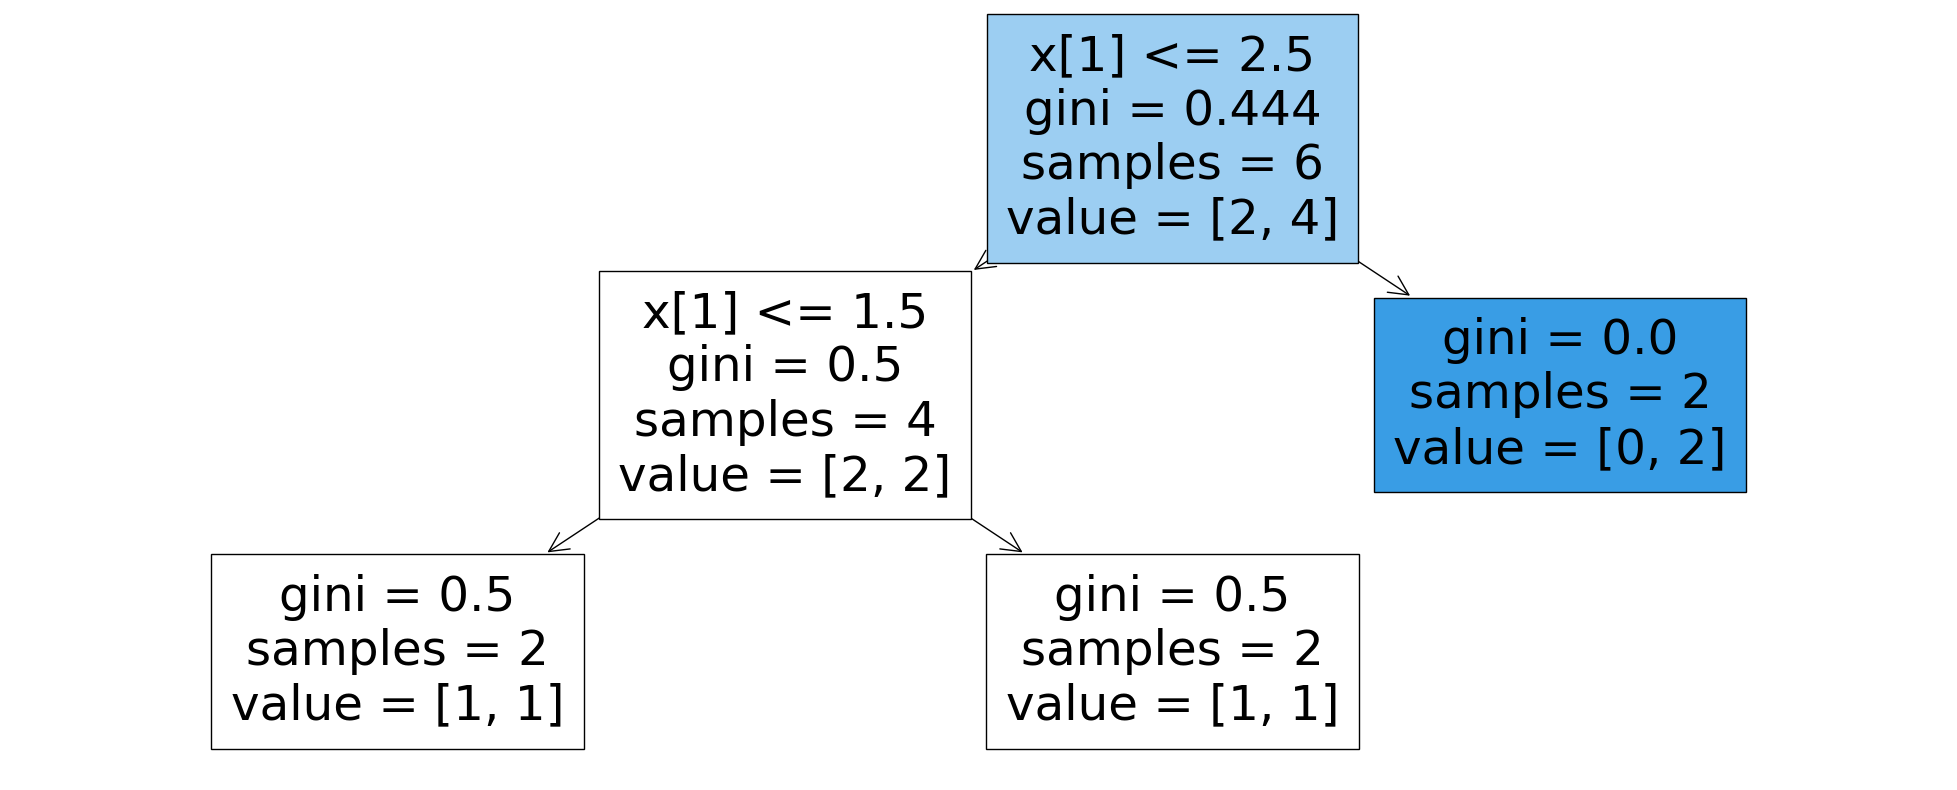

In [25]:
fig = plt.figure(figsize=(25,10))
dectree_plot = plot_tree(short_tree, filled=True)

Our model no longer gets perfect accuracy on the _training data_. However, it probably would do better on the _testing data_ since we have limited the maximum depth to prevent overfitting. This is an example of the bias - variance tradeoff in machine learning. A model with high variance has learned the training data very well but often cannot generalize to new points in the test set. On the other hand, a model with high bias has not learned the training data very well because it does not have enough complexity. This model will also not perform well on new points.

Limiting the depth of a single decision tree is one way we can try to reduce the variance of a. Another option is to use an entire forest of trees, training each one on a random subsample of the training data. The final model then takes an average of all the individual decision trees to arrive at a classification. This is the idea behind the random forest.

Hopefully this simple example has given you an idea of how a Decision Tree makes classifications. It looks at the features and the labels, and tries to construct a flowchart of questions that end in the correct classification for each label. If we don't limit the depth of the tree, it can correctly classify every single point in the training data. This will lead to overfitting though and an inability to do well on testing data. We didn't have any testing data in this example, but in the next problem, using a real-world dataset, we do and we'll see how overfitting can be an issue! 

Feel free to try out other pruning strategies and values, that you can find in the documentation and plot the decision tree.

Model Accuracy: 1.0


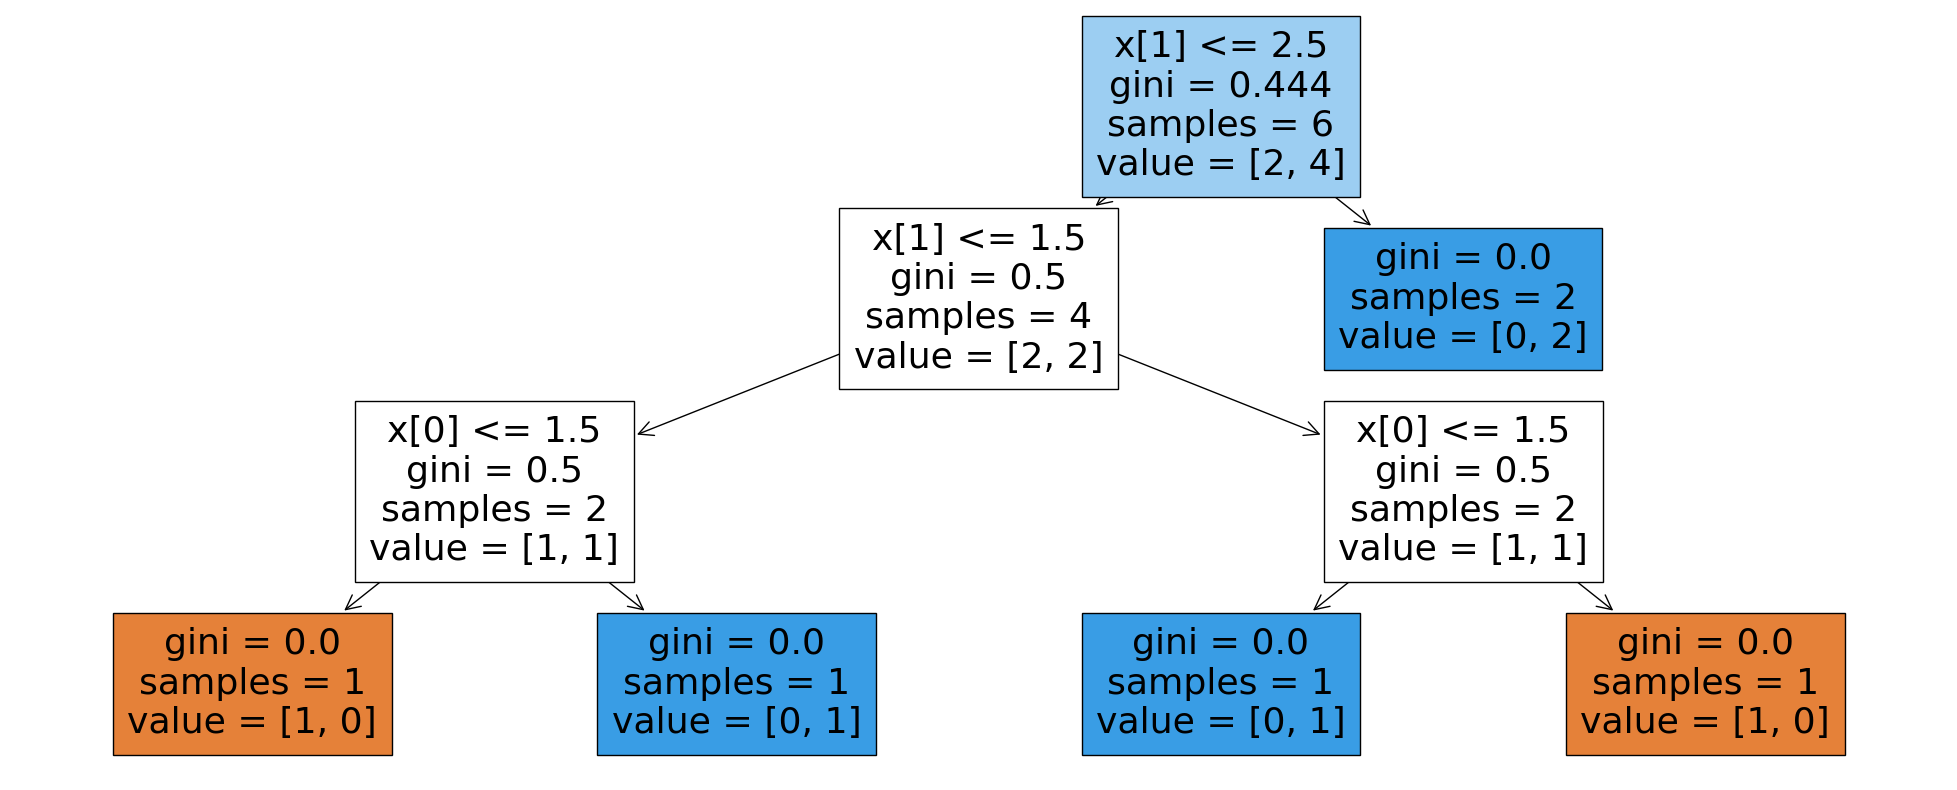

In [26]:
# Try out other hyperparameters
other_short_tree = DecisionTreeClassifier(random_state=RSEED)
other_short_tree.fit(X, y)

print(f'Model Accuracy: {other_short_tree.score(X, y)}')
fig = plt.figure(figsize=(25,10))
other_dectree_plot = plot_tree(other_short_tree, filled=True)

Model Accuracy: 0.2857142857142857


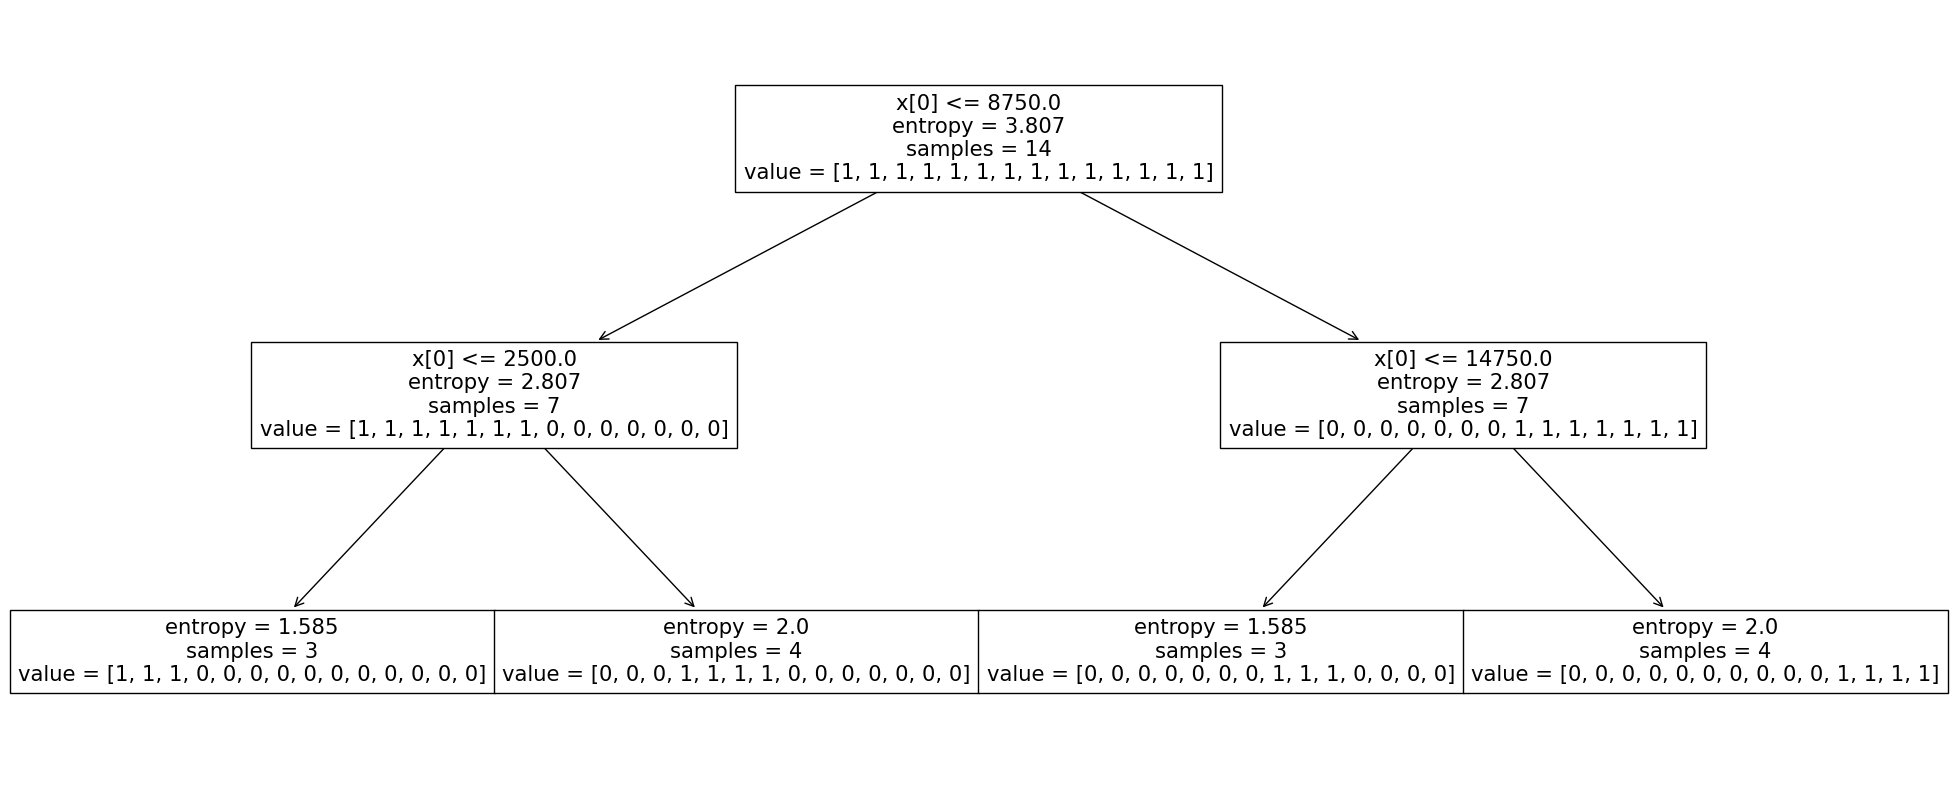

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Try different pruning-related hyperparameters
other_short_tree = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=2,
    criterion="entropy",
    random_state=RSEED
)

other_short_tree.fit(X, y)

print(f"Model Accuracy: {other_short_tree.score(X, y)}")

# Plot the pruned tree
plt.figure(figsize=(25, 10))
plot_tree(other_short_tree, filled=True)
plt.show()

This part should illustrate the decision tree algorithm on a very simple dataset, where it is easy to plot and understand how decisions are made.

Normally, we have more data and more complexity in it. So let's change to a real dataset.

## Decision Tree Regressor

Decision Trees are more often used on classification tasks, but you can also use them for regression. We will create a fictitious dataset about video games including the type of the game, the production cost and the profit for 14 games. Given the production cost, we want to predict the profit of those games

In [27]:
# Data description: Name, Production Cost, Profit.
dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000],  
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 

# print the dataset 
print(dataset)

[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


## Define feature and target

We will select the second column (production cost) as the feature we will feed into our Decision Tree and the elements in the third column (profit) as our target variable.

In [28]:
# select all rows from production cost column
X = dataset[:, 1:2].astype(int)  

# select all rows from profit column to represent the labels
y = dataset[:, 2].astype(int)  


## Modelling

We will train our `DecisionTreeRegressor` on the complete dataset. In a second step we will use the fitted model to predict the profit for a new instance. 

In [29]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
dec_tree = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
dec_tree.fit(X, y) 

DecisionTreeRegressor()

In [30]:
# predicting a new value 
# test the output by changing values, like 3750 
y_pred = dec_tree.predict(np.array(3750).reshape(1, -1)) 
  
# print the predicted price 
print("Predicted Profit: % d\n"% y_pred) 

Predicted Profit:  8000



## Visualising the result

We can visualise our decision tree and the results in various ways. The first plot shows for which production costs our model predicts which prices.

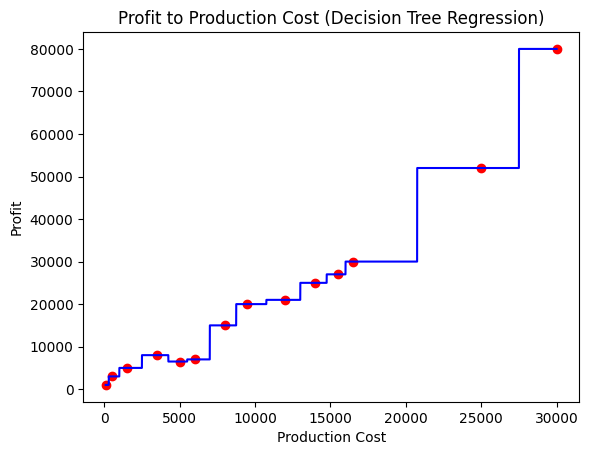

In [31]:
# use np.arange for creating a range of values from min value of X to max value of X  
# with a difference of 0.01 between two consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 
  
# use .reshape for reshaping the data into a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
# scatter plot for original data 
plt.scatter(X, y, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, dec_tree.predict(X_grid), color = 'blue')  
  
# specify title and labels
plt.title('Profit to Production Cost (Decision Tree Regression)')  
plt.xlabel('Production Cost') 
plt.ylabel('Profit') 
  
# show the plot 
plt.show() 

 In the second plot you can see a visual representation of our decision tree from the stump to the leaves. We will use [sklearns `plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function for this.  

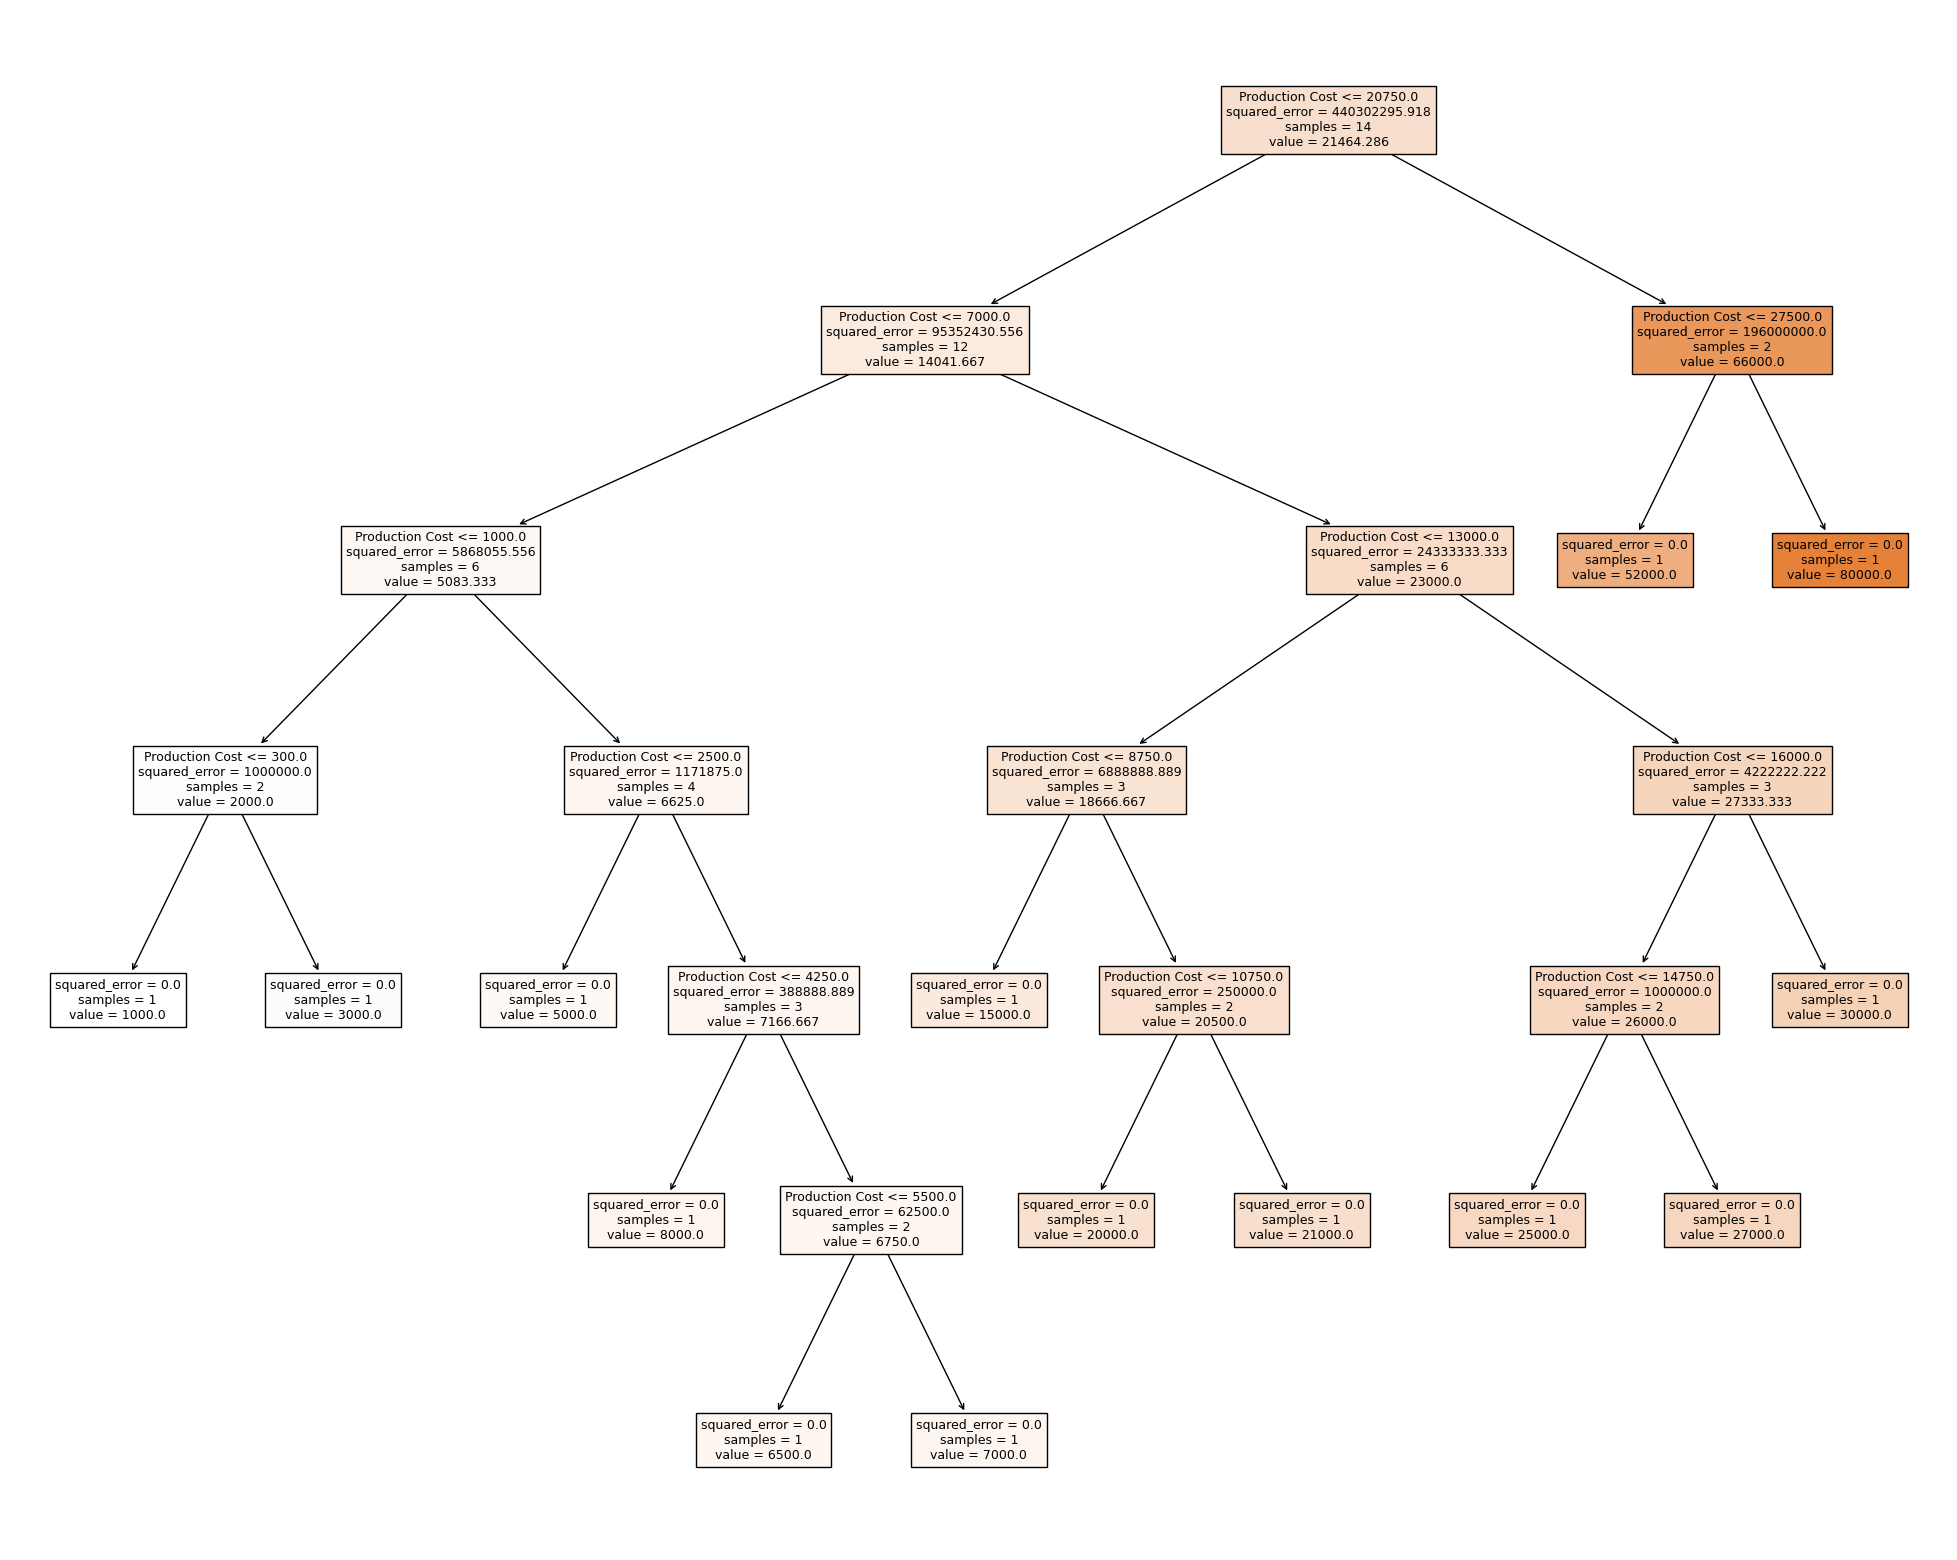

In [32]:
# import necessary library  
from sklearn.tree import plot_tree
  
fig = plt.figure(figsize=(25,20))
dectree_plot = plot_tree(dec_tree,feature_names=['Production Cost'], filled=True)

# You can export the graphic with the following command
# plt.savefig('decision_tree')

You can try to change some parameters of the decision tree, like `max_depth`, `max_features` etc. to see how it affects the results below. In the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) you will find some ideas. (You can also try out the `monotonic_cst`. If you have business understanding / prior knowledge, indicating that a given feature should in general have a positive (or negative) effect on the target value, this is a way to add this business understanding to your model.)

Plot also the the decision tree and regression line.


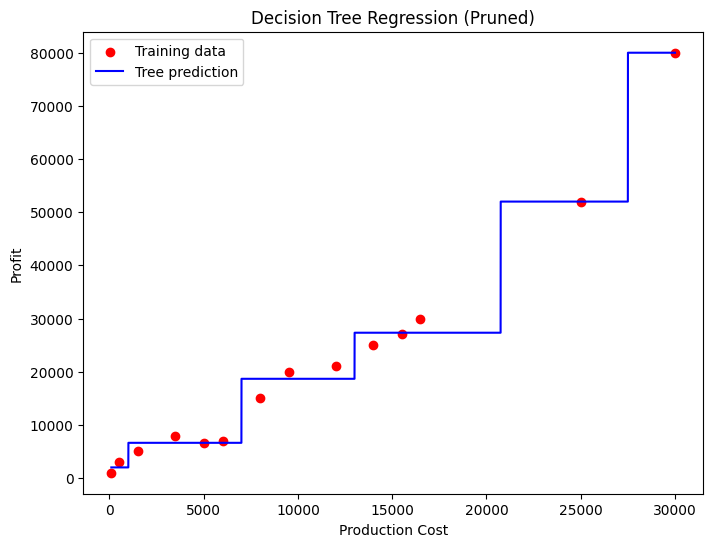

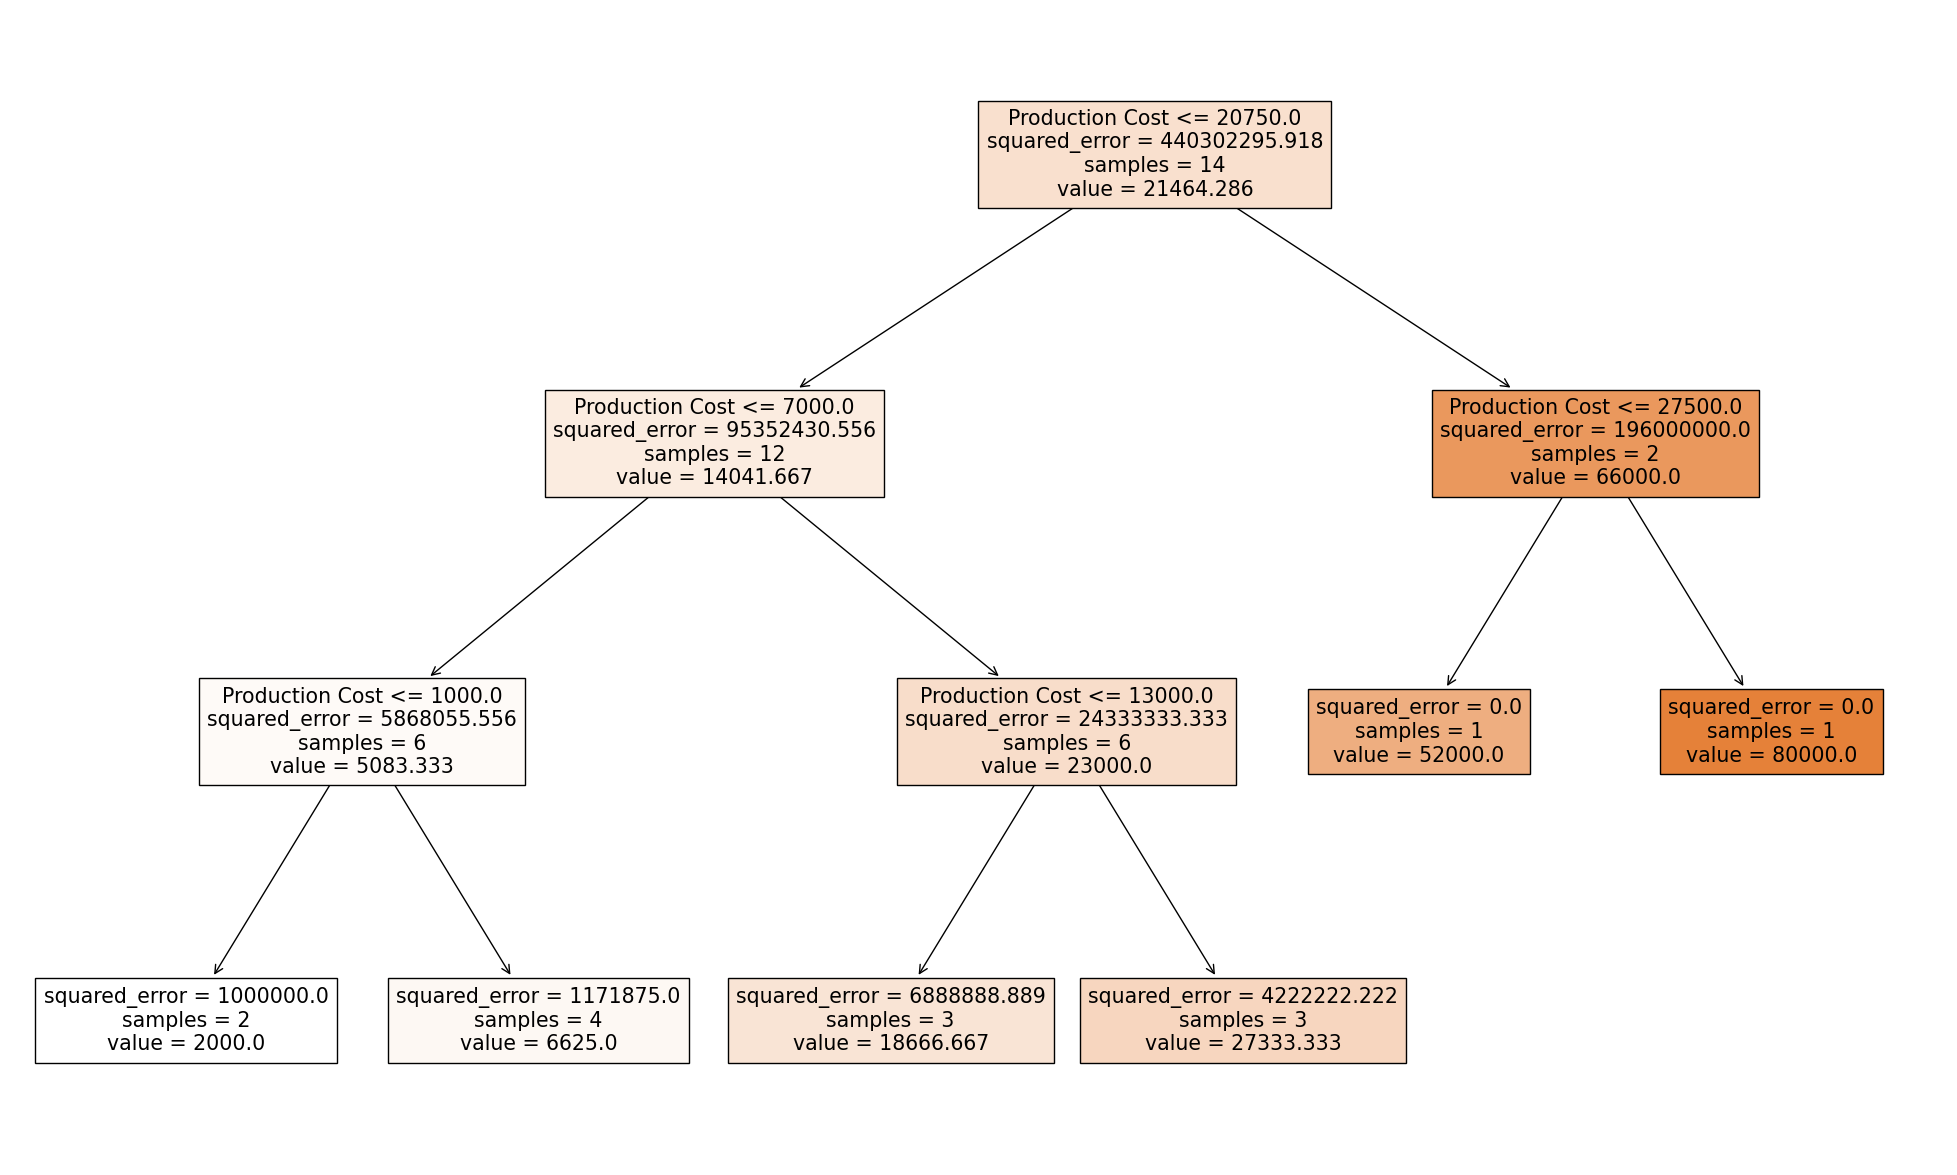

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Train a pruned decision tree regressor
reg_tree = DecisionTreeRegressor(
    max_depth=3,
    max_features=1,
    random_state=50
)

reg_tree.fit(X, y)

# Predict on a fine grid for smooth plotting
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
y_grid_pred = reg_tree.predict(X_grid)

# Plot regression result
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="red", label="Training data")
plt.plot(X_grid, y_grid_pred, color="blue", label="Tree prediction")
plt.xlabel("Production Cost")
plt.ylabel("Profit")
plt.title("Decision Tree Regression (Pruned)")
plt.legend()
plt.show()

# Plot the decision tree itself
plt.figure(figsize=(25, 15))
plot_tree(
    reg_tree,
    feature_names=["Production Cost"],
    filled=True
)
plt.show()

	•	max_depth controls how deep the tree is allowed to grow
→ deeper tree = more complex, higher risk of overfitting
→ shallow tree = simpler, may underfit
	•	max_features limits how many features the tree can look at when splitting
→ another way to stop the model from becoming too complex
	•	In regression, a decision tree does not produce a smooth curve
→ it predicts in steps (piecewise constant values)
	•	Pruning usually lowers training accuracy but helps on unseen data
→ this is the bias vs variance tradeoff
	•	monotonic_cst can be useful when you have business intuition
→ e.g. higher production cost should generally not lead to lower profit
→ lets you bake that assumption directly into the model
	•	Plotting both things matters:
	•	the regression line shows what the model predicts
	•	the tree diagram shows why it predicts that way

Overall: pruning makes the model less clever on training data, but more trustworthy in the real world.